# Preprocessing

* Dropping duplicate rows
* Finding and handling duplicate columns
* Inspecting column data type
* Splitting numerical and categorical variables
* Checking and Filling missing values
* Filling Numerical
* Inspeting with EDA
* Filling Categorical
* Handling Class imbalance
* Outfier detection and removal
* Scaling numerical columns
* Encoding categorical columns
* Pickle Scalers and Encoders
* Separating features and labels
* Train-test split

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
data.shape

(398, 9)

In [5]:
data.head(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [9]:
for col in data.columns:
    if data[col].dtype == 'object':
        check_spc = data[col].str.contains(r'[^a-zA-Z0-9\s]', na=False)
        if check_spc.any():
            print(f"Special characters found in column: {col}")
            print(data[col][check_spc].unique())

Special characters found in column: horsepower
['?']
Special characters found in column: car name
["plymouth 'cuda 340" 'buick estate wagon (sw)' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'amc matador (sw)'
 'chevrolet chevelle concours (sw)' 'ford gran torino (sw)'
 'plymouth satellite custom (sw)' 'volvo 145e (sw)' 'volkswagen 411 (sw)'
 'peugeot 504 (sw)' 'renault 12 (sw)' 'ford pinto (sw)' 'datsun 510 (sw)'
 'toyouta corona mark ii (sw)' 'dodge colt (sw)'
 'toyota corolla 1600 (sw)' 'buick century luxus (sw)'
 'dodge coronet custom (sw)' 'fiat x1.9' 'chevrolet monza 2+2'
 'amc pacer d/l' 'datsun b-210' 'mercedes-benz 280s'
 'datsun f-10 hatchback' 'ford mustang ii 2+2' 'dodge colt m/m'
 'mazda rx-4' 'ford fairmont (auto)' 'ford fairmont (man)'
 'amc concord d/l' 'buick regal sport coupe (turbo)' 'datsun 200-sx'
 'dodge st. regis' 'chevrolet malibu classic (sw)'
 'chrysler lebaron town @ country (sw)' 'v

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64


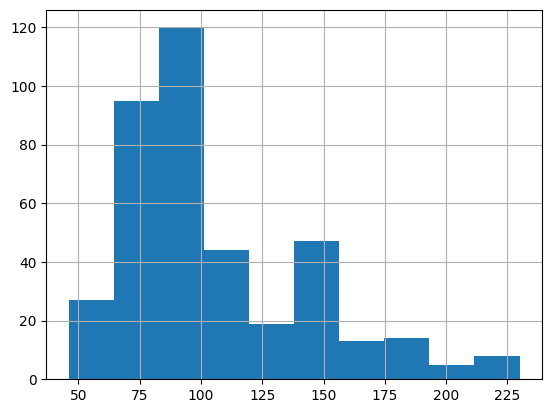

In [10]:
data.replace('?', np.nan, inplace=True)
data['horsepower'] = pd.to_numeric(data['horsepower'])
data['horsepower'].hist()
print(data['horsepower'].describe())

In [11]:
data['horsepower'].fillna(data['horsepower'].median(), inplace=True)

/tmp/ipython-input-11-3115432215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].fillna(data['horsepower'].median(), inplace=True)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [13]:
num_data=data.select_dtypes(include="number")
cat_data=data.select_dtypes(include="object_")

In [14]:
print(num_data)
print(cat_data)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4    

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']


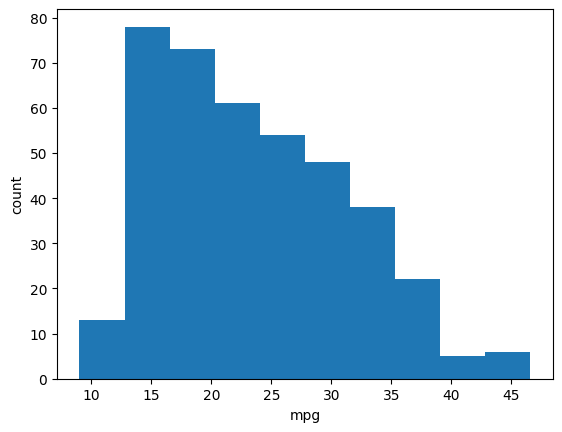

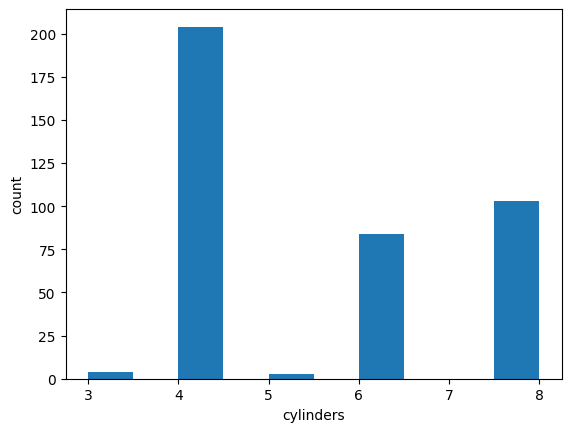

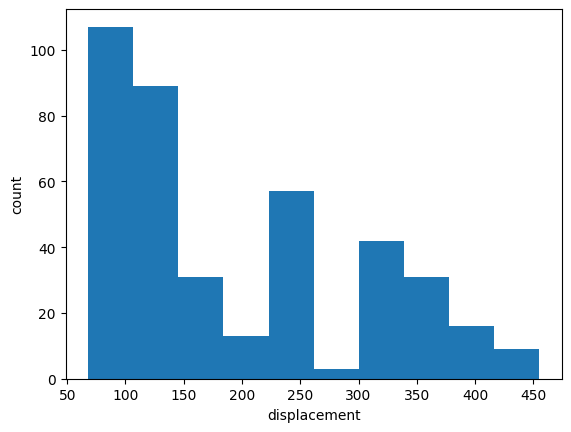

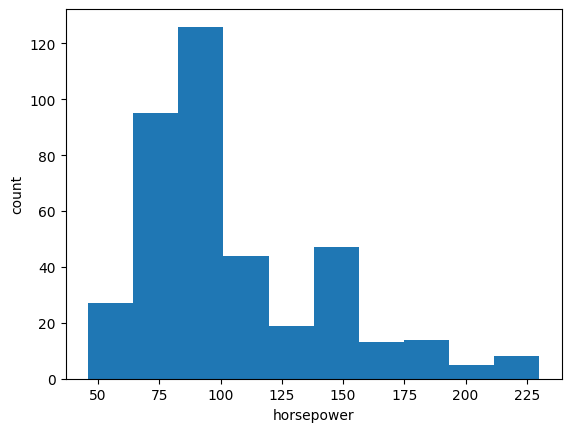

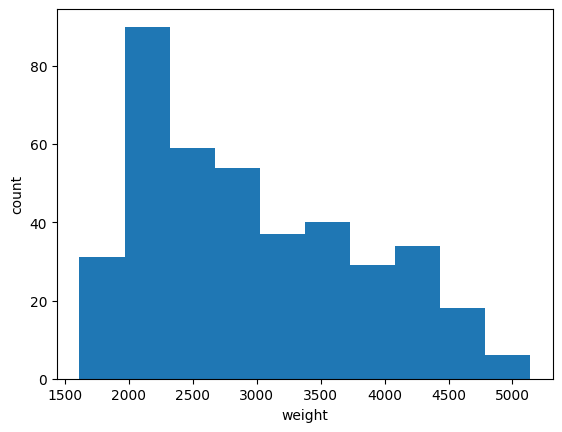

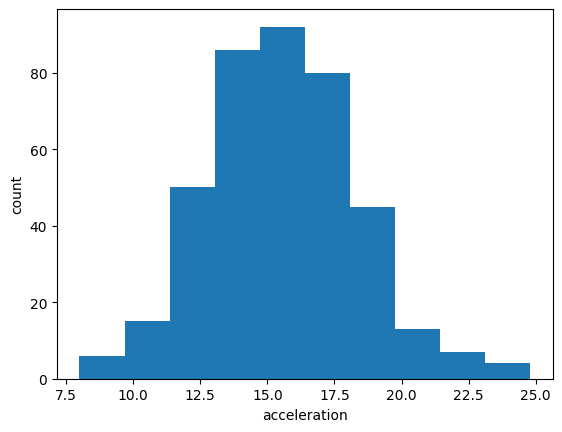

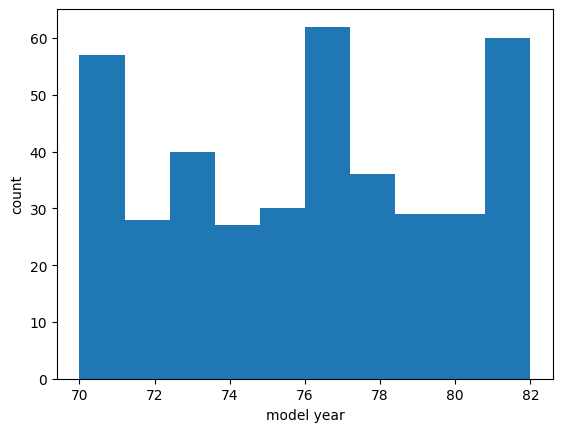

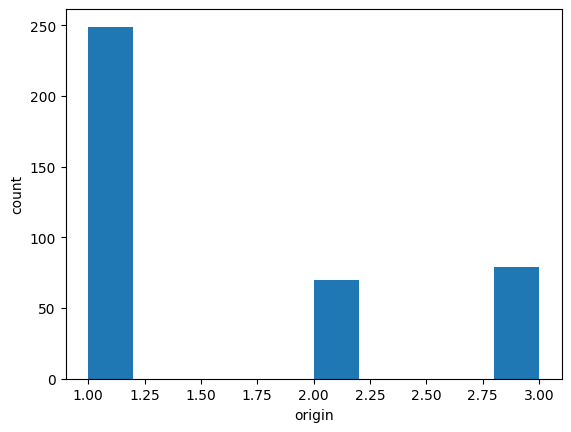

In [15]:
num_cols=num_data.columns.tolist()
print(num_cols)
for col in num_cols:
  plt.hist(num_data[col])
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

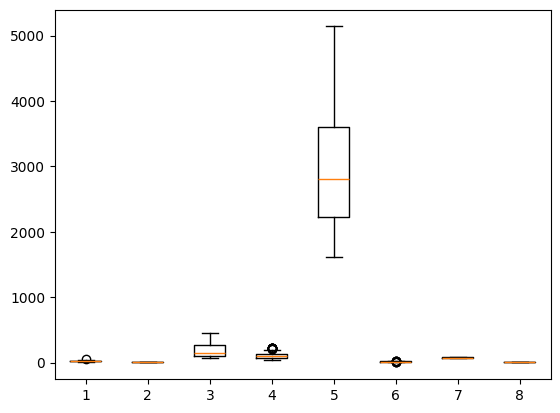

In [16]:
plt.boxplot(num_data)
plt.show()

In [17]:
def replace_outliers(df,column_name):
  q1=df[column_name].quantile(0.25)
  q3=df[column_name].quantile(0.75)
  iqr=q3 - q1
  upper_bound=q3 + 1.5 * iqr
  lower_bound=q1 - 1.5 * iqr
  df[column_name]=df[column_name].clip(upper=upper_bound)
  df[column_name]=df[column_name].clip(lower=lower_bound)
  return df[column_name]

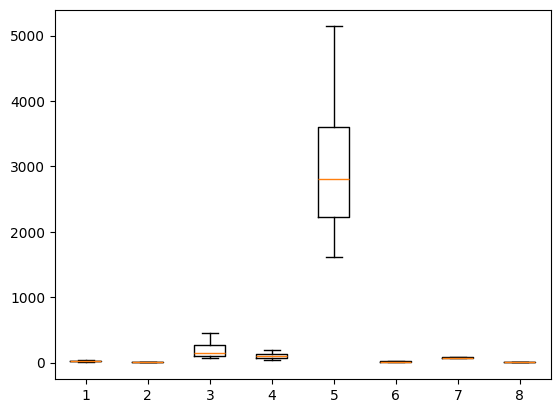

In [21]:
plt.boxplot(num_data)
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max_scalar=MinMaxScaler()
num_df=min_max_scalar.fit_transform(num_data)

In [23]:
num_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,22.2,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [24]:
cat_cols=cat_data.columns.tolist()

In [25]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
  encoder=LabelEncoder()
  cat_data[col]=encoder.fit_transform(cat_data[col])

In [26]:
cat_data

,car name
0,49
1,36
2,231
3,14
4,161
...,...
393,153
394,301
395,119
396,159


In [27]:
import pickle
with open("min_max_scalar.pkl","wb") as f:
  pickle.dump(min_max_scalar,f)

In [28]:
final_data=pd.concat([num_data,cat_data],axis=1)

In [30]:
y=final_data["horsepower"]
X=final_data.drop("horsepower",axis=1)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)